In [16]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [17]:
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [18]:
def to_runs(annotation):
    encoded_ints = [int(s) for s in encoding.split(" ")]
    starts = encoded_ints[::2]
    runs = encoded_ints[1::2]
    
    return starts, runs


def to_coord(index, height):
    """
    Parameters
    ----------
    index: int
        Zero-based linear index
    """
    row = index % height
    col = index // height

    return row, col


def to_img(annotation, width, height):
    starts, runs = to_runs(annotation)
    # img = np.full((height, width), np.nan)
    img = np.zeros((height, width))

    for start, run in zip(starts, runs):
        coords = [to_coord(i - 1, height) for i in range(start, start + run)]

        for c in coords:
            img[c] = 1

    return img

In [6]:
train_df = pd.read_csv('./sartorius-cell-instance-segmentation/train.csv')

In [7]:
train_df.head()

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
2,0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
3,0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 2...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
4,0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00


In [8]:
train_df.where(train_df['id']=='0030fd0e6378')

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704.0,520.0,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704.0,520.0,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
2,0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 1...,704.0,520.0,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
3,0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 2...,704.0,520.0,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
4,0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 1...,704.0,520.0,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
...,...,...,...,...,...,...,...,...,...
73580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
img=mpimg.imread('./sartorius-cell-instance-segmentation/train/0030fd0e6378.png')

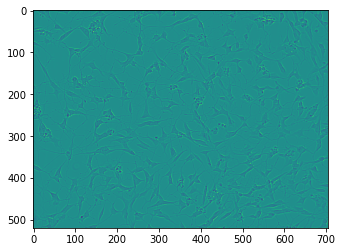

In [11]:
imgplot = plt.imshow(img)


In [19]:
type(np.where(train_df['id'] == '0030fd0e6378')[0].tolist())

list

In [20]:
height = train_df.loc[0, "height"]
width = train_df.loc[0, "width"]
cell_img = np.zeros((width, height))
idxs = np.where(train_df['id'] == '0030fd0e6378')[0].tolist()

In [21]:
for idx in idxs:
    encoding = train_df.loc[idx, "annotation"]
    cell_img += to_img(encoding, height, width)

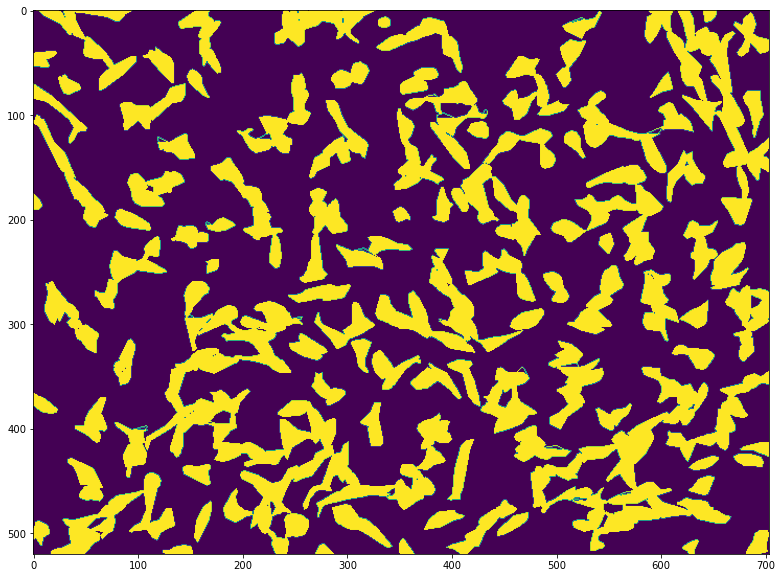

In [22]:
plt.imshow(cell_img.T > 0)

In [23]:
img.shape

(520, 704)

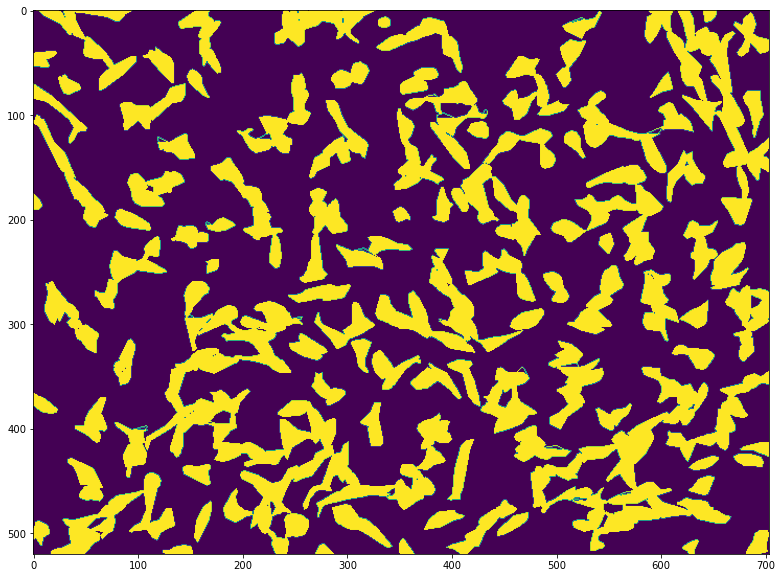

In [24]:
plt.imshow(cell_img.T > 0, alpha=1)

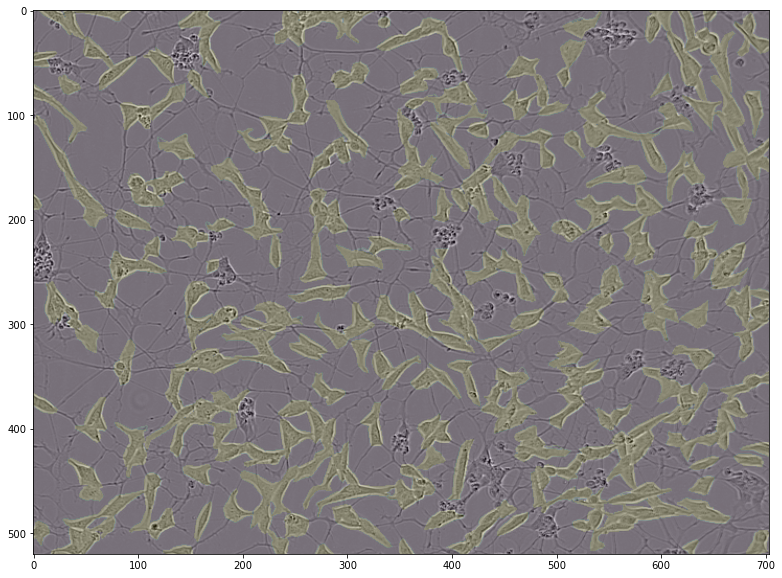

In [26]:
plt.imshow(cell_img.T > 0, alpha=1)
plt.imshow(img, alpha=0.9, cmap="gray")
plt.show()